In [2]:
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from simplemma import text_lemmatizer

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation


In [3]:
df = pd.read_csv(r"C:\Users\ozdem\dataset_turkce_haberler.csv")

In [4]:
df.head()

,Unnamed: 0,text
0,0,DUVAR - Milyonlarca emekçinin beklediği 2024 a...
1,1,DUVAR - Otomotiv devi Daihatsu'da ortaya çıkan...
2,2,DUVAR - Milyonlarca işçinin beklediği asgari ü...
3,3,DUVAR - Konut kredisi faiz oranları banka bank...
4,4,DUVAR - Güven endeksi aralıkta geçen aya oranl...


In [5]:
stopWords = set(stopwords.words('turkish'))

In [6]:
def clean_text(text):
    
    text = text.replace("DUVAR -", " ")
    text = text.replace("duvar", " ")
    text = text.replace("(HABER MERKEZİ)", " ")
    text = text.replace("(EKONOMİ SERVİSİ)", " ")
    text = text.replace("[/inlinetweet]", "")
    text = text.lower()
    text = re.sub("[0-9]+", "", text)
    text = re.sub("’|“|”|‘|–|—", " ", text)
    text = re.sub(r"https?:\/\/\S+", " ", text)
    text = re.sub(r"http?:\/\/\S+", " ", text)
    text = text_lemmatizer(text, lang="tr")
    text = [re.sub("[0-9]+", "", element) for element in text]
    text = " ".join([word for word in text if word not in stopWords])
    
    
    turkish_punctuation = ".,;:!?()[]{}'\"<>-_+=*&^%$#@~`|\\/"
    translate_table = str.maketrans("", "", turkish_punctuation)
    text = text.translate(translate_table)
    
    return text

In [7]:
df.dropna(subset=["text"], inplace=True)

In [8]:
df["clean"] = df["text"].apply(lambda row: clean_text(row))

In [9]:
df["clean"][67]

'i stanbul serbest piyasa  lira başla dolar  e çık yeni rekor kır dolar  tl  merkez banka  nın faiz karar ardından yatay seyir hareket sür  euro i  lira gün başla  serbest piyasa saat  itibaren dolar  tl   euro i  seviye işlem gör  dün dolar sat fiyat  lira  euro sat fiyat i  lira ol  bugün yurt iç açıkla türkiye cumhuriyet merkez banka  nın  tcmb  faiz karar yatırım odak yerleş  tcmb para politika kurul  ppk  faiz beklenti dahili baz puan artır yüz  ye çık  öte yan  tcmb  nin para politika kurul  ppk  toplantı ilişkin aa finans  ın beklenti anket kat ekonomist  banka bir hafta vade repo ihale faiz oran  politika faiz  baz puan artır yüz  ye çık tahmin et  piyasa bugün takip et veri şöyle  abd   çeyrek gsyh  abd  aralık ay philiadelphia imalat sanayi endeks haftalık işsizlik maaş başvuru  abd  kasım ay ön endeks '

In [10]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df["clean"])

In [11]:
lda = LatentDirichletAllocation(n_components=8, random_state=16)

In [12]:
lda.fit(X)

LatentDirichletAllocation(n_components=8, random_state=16)

In [13]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

def plot_top_words(model, feature_names, n_top_words=10, title="Title"):
    fig, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1: -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [14]:
feature_names = vectorizer.get_feature_names_out()

In [15]:
feature_names[:10]

array(['aa', 'aaa', 'aabid', 'aachen', 'aaekonomi', 'aagalatasaray',
       'aahaber', 'aalborg', 'aanholt', 'aarhus'], dtype=object)

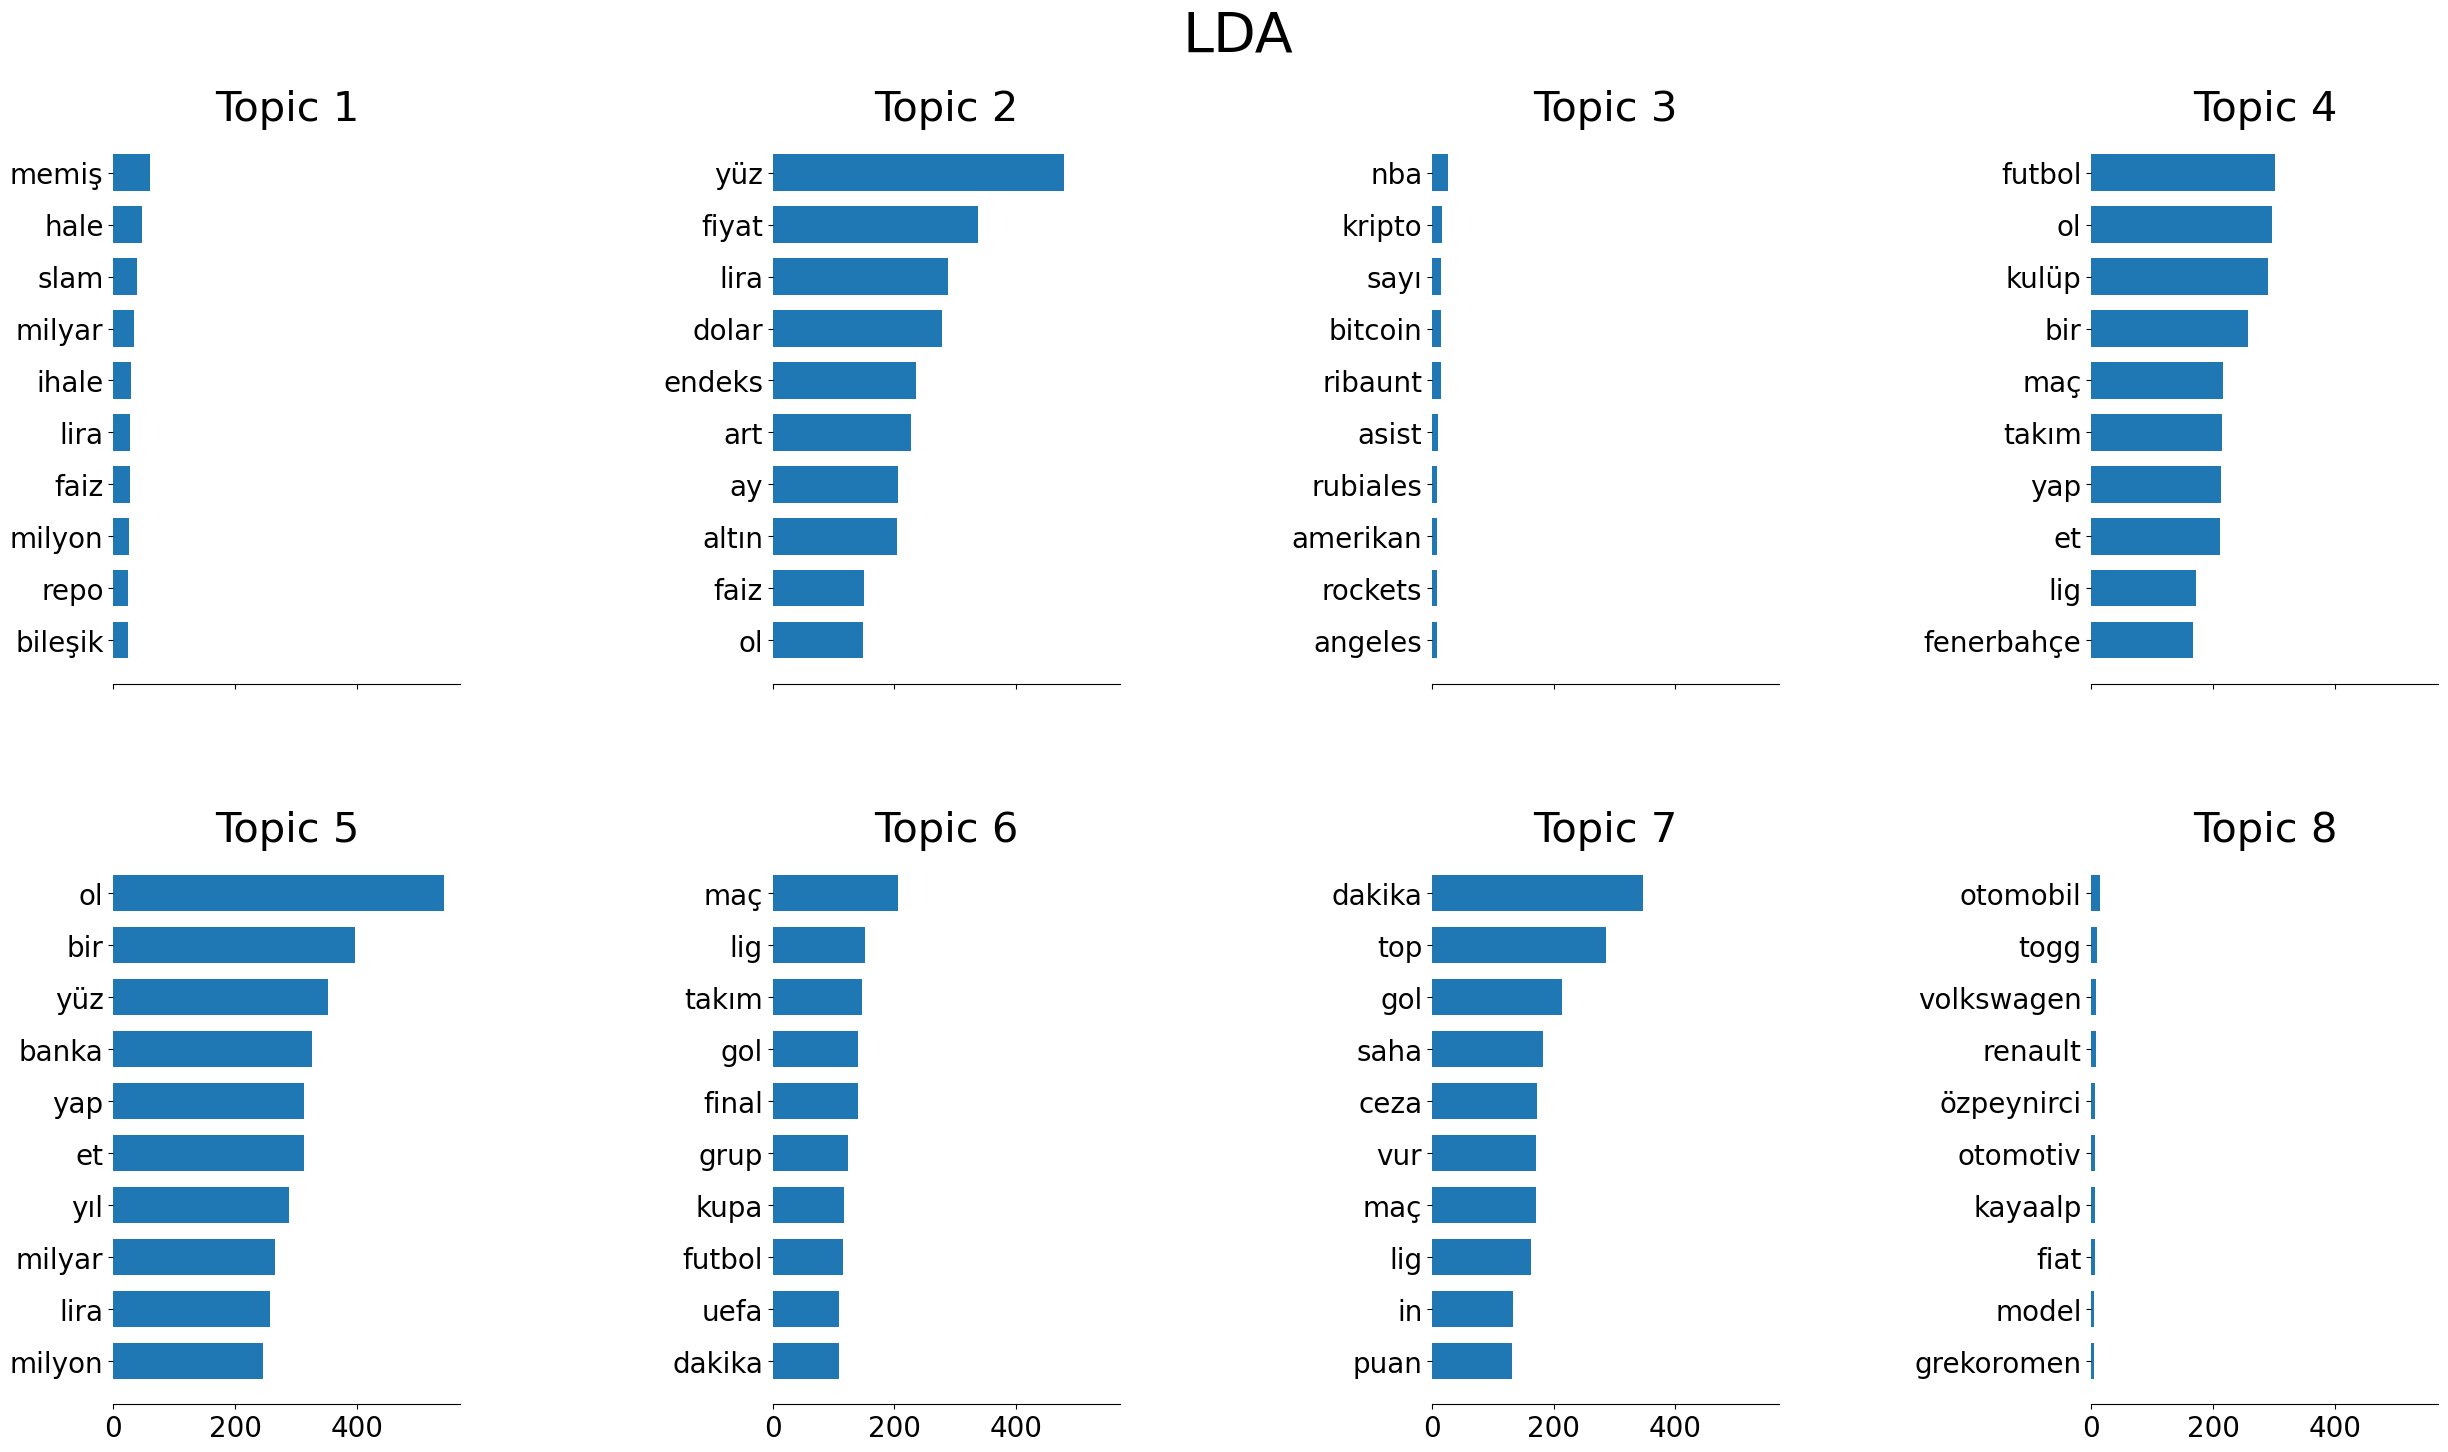

In [16]:
plot_top_words(lda, feature_names, title="LDA")

In [17]:
nmf = NMF(n_components=8, beta_loss="kullback-leibler", solver="mu", random_state=16)

In [18]:
nmf.fit(X)

NMF(beta_loss='kullback-leibler', n_components=8, random_state=16, solver='mu')

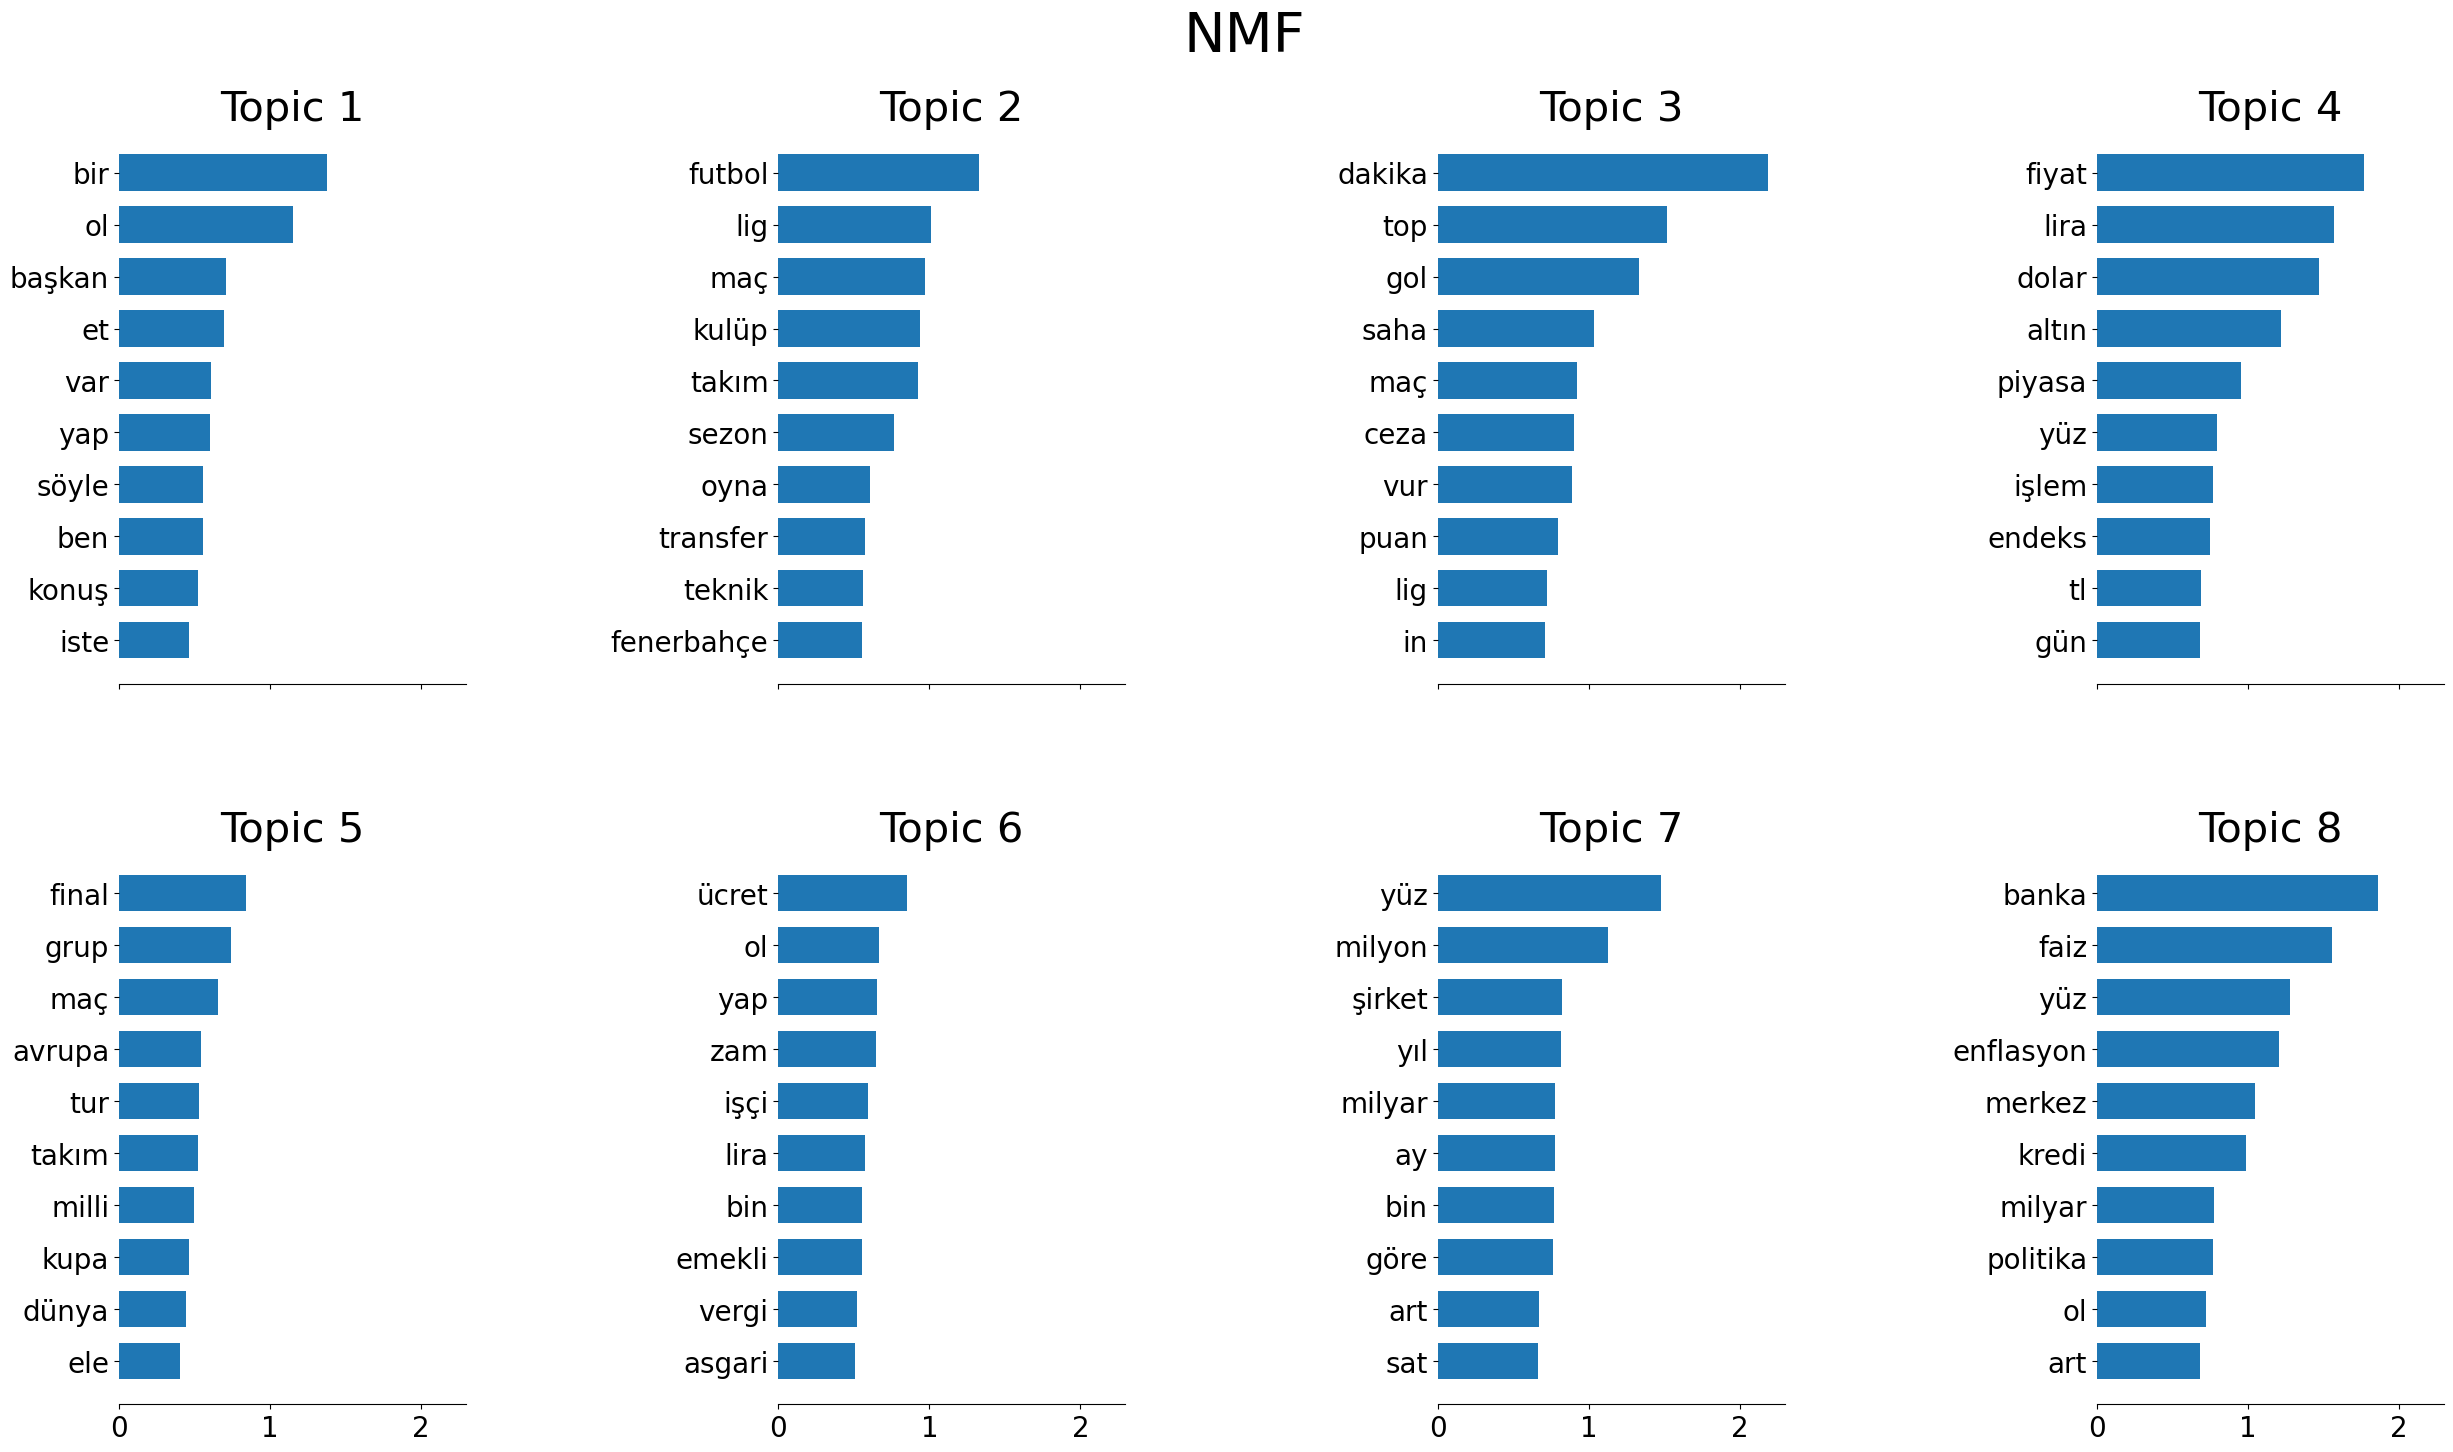

In [19]:
plot_top_words(nmf, feature_names, title="NMF")